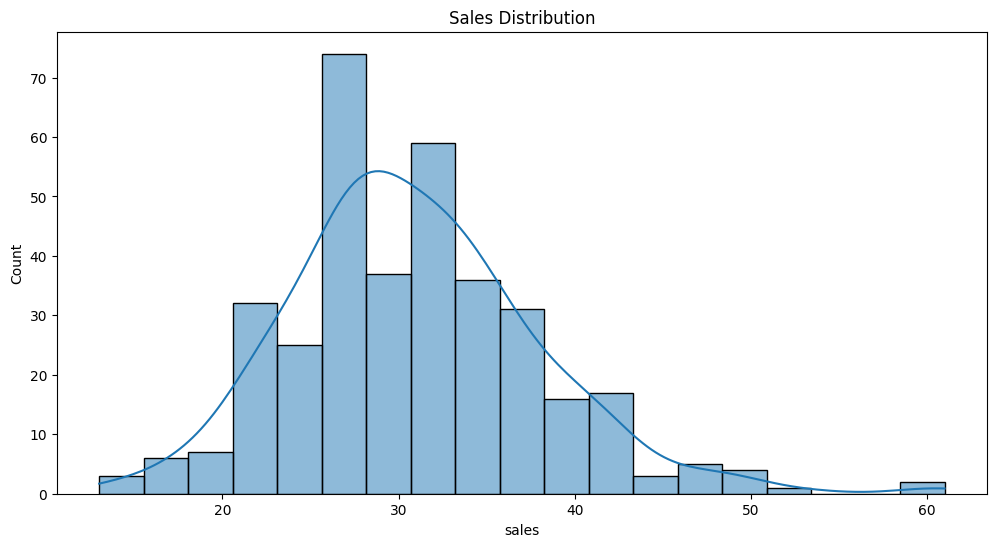

ValueError: could not convert string to float: '1/1/2015'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
data = pd.read_csv('data/chickendailysales.csv')

# Removed downcasting to prevent any keyerrors
data['sales'] = pd.to_numeric(data['sales'])

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.histplot(data['sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

# Correlation analysis using Pearson's r
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering: Label Encoding
label_encoder = LabelEncoder()
data['category_encoded'] = label_encoder.fit_transform(data['category'])

# Introducing lags
data['sales_lag1'] = data['sales'].shift(1)
data['sales_lag2'] = data['sales'].shift(2)

# Mean encoding
mean_encoded = data.groupby('category')['sales'].mean().to_dict()
data['category_mean_encoded'] = data['category'].map(mean_encoded)

# Rolling statistics
data['rolling_mean'] = data['sales'].rolling(window=3).mean()
data['rolling_std'] = data['sales'].rolling(window=3).std()

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Time-based features
data['day_of_week'] = data['date'].dt.day_name()
data['month'] = data['date'].dt.month
data['quarter'] = data['date'].dt.quarter

# Create business-friendly visualizations
plt.style.use('seaborn')
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Chicken Sales Analysis Dashboard', fontsize=16, y=0.95)

# 1. Monthly Sales Trend
monthly_sales = data.groupby(data['date'].dt.strftime('%Y-%m'))['sales'].mean()
axes[0,0].plot(monthly_sales.values, marker='o')
axes[0,0].set_title('Monthly Sales Trend')
axes[0,0].set_xlabel('Months')
axes[0,0].set_xticks(range(len(monthly_sales)))
axes[0,0].set_xticklabels(monthly_sales.index, rotation=45)
axes[0,0].grid(True)

# 2. Average Sales by Day of Week
daily_sales = data.groupby('day_of_week')['sales'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
axes[0,1].bar(daily_sales.index, daily_sales.values, color='skyblue')
axes[0,1].set_title('Average Sales by Day of Week')
axes[0,1].set_xticklabels(daily_sales.index, rotation=45)
axes[0,1].grid(True)

# 3. Sales by Category
category_sales = data.groupby('category')['sales'].mean().sort_values(ascending=False)
axes[1,0].bar(category_sales.index, category_sales.values, color='lightgreen')
axes[1,0].set_title('Average Sales by Category')
axes[1,0].set_xticklabels(category_sales.index, rotation=45)
axes[1,0].grid(True)

# 4. Quarterly Sales Box Plot
sns.boxplot(x='quarter', y='sales', data=data, ax=axes[1,1])
axes[1,1].set_title('Sales Distribution by Quarter')
axes[1,1].grid(True)

plt.tight_layout()
plt.show()

# Decompose time series for seasonality analysis

# Resample data to daily frequency and fill missing values
daily_sales = data.set_index('date')['sales'].resample('D').mean().fillna(method='ffill')

# Perform seasonal decomposition
decomposition = seasonal_decompose(daily_sales, period=7)  # 7 for weekly seasonality

# Plot decomposition
plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(daily_sales)
plt.title('Original Time Series')
plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')
plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()


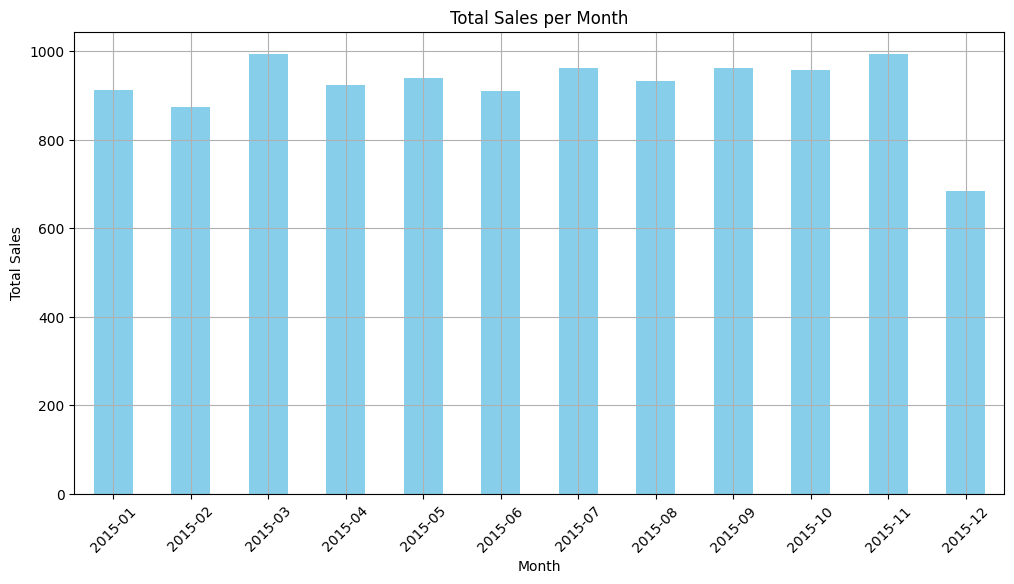

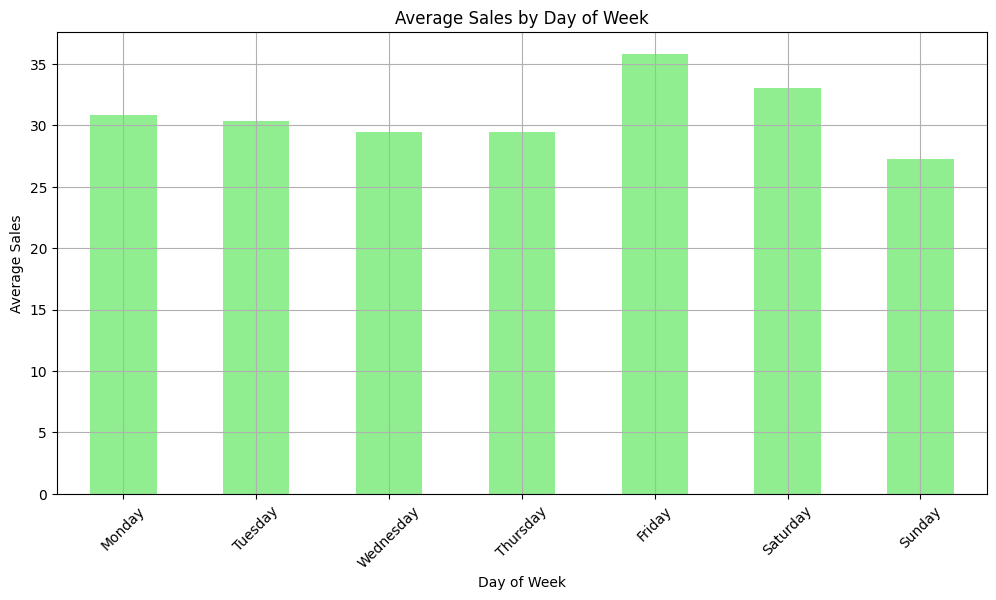

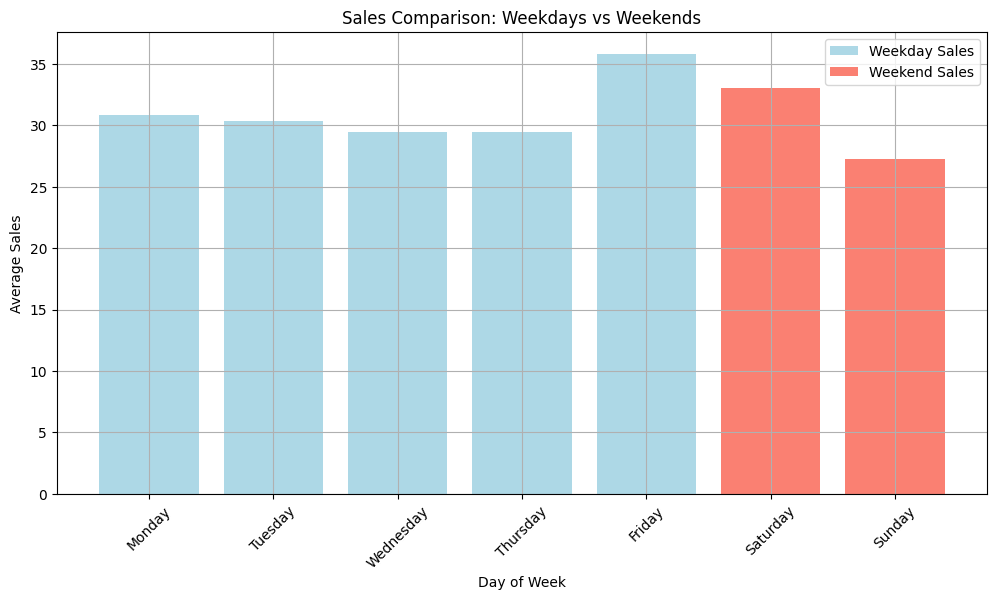

ValueError: could not convert string to float: 'Thursday'

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
data = pd.read_csv('data/chickendailysales.csv')

# Removed downcasting to prevent any keyerrors
data['sales'] = pd.to_numeric(data['sales'])

# Convert date column to datetime with dayfirst=True to handle formats like "13/1/2015"
data['date'] = pd.to_datetime(data['date'], dayfirst=True)

# Time-based features
data['day_of_week'] = data['date'].dt.day_name()
data['month'] = data['date'].dt.month
data['quarter'] = data['date'].dt.quarter
data['is_weekend'] = data['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

# Monthly Sales Visualization
monthly_sales = data.groupby(data['date'].dt.strftime('%Y-%m'))['sales'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Average Sales by Day of Week
daily_sales = data.groupby('day_of_week')['sales'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
], fill_value=0)  # Fill missing days with 0 sales
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='bar', color='lightgreen')
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Weekend vs Weekday Sales
weekday_sales = data[data['is_weekend'] == 0].groupby('day_of_week')['sales'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'
], fill_value=0)  # Fill missing days with 0 sales
weekend_sales = data[data['is_weekend'] == 1].groupby('day_of_week')['sales'].mean().reindex(['Saturday', 'Sunday'], fill_value=0)  # Fill missing days with 0 sales

plt.figure(figsize=(12, 6))
plt.bar(weekday_sales.index, weekday_sales.values, color='lightblue', label='Weekday Sales')
plt.bar(weekend_sales.index, weekend_sales.values, color='salmon', label='Weekend Sales')
plt.title('Sales Comparison: Weekdays vs Weekends')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Correlation analysis using Pearson's r
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Importance using Pearson's r
feature_importance = correlation_matrix['sales'].drop('sales').sort_values(ascending=False)
print("Feature Importance based on Pearson's r:")
print(feature_importance)